In [1]:
import sys
import os
import pandas as pd
import numpy as np
sys.path.insert(0, r'D:\uni\Masterarbeit\Code\auswertung')
import auswertung_ma
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# from auswertung_ma import f_exp, f_poly, f_poly_long

In [2]:
# plot settings:
plot_output_path = r'D:\Uni\Masterarbeit\MA_Dokument\english\bilder'

markersize = 11
markerfacecolor = 'none'

label_fontsize = 20
capsize = 5
axislabelsize = 35

legendfontsize = 30

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans Serif"],
})

## Vergleich der beiden LP Kurven für N=8, c=4, k=5

In [121]:
# ohne extra constraints
p = r'D:\Uni\Masterarbeit\Daten\LP_vs_LP\LPVLPOPT5_8_nodes_5_scenarios'

# mit EC
p_ec = r'D:\Uni\Masterarbeit\Daten\LP_vs_LP\LPVLPOPT4_8_nodes_5_scenarios'

d = auswertung_ma.Read_HO(p,'p', -2, read_lp=False, read_tracking=False)
d_ec = auswertung_ma.Read_HO(p_ec,'p', -2, read_lp=False, read_tracking=False)

mr, sme = d.calc_mean_alg_results()
mr_ec, sme_ec = d_ec.calc_mean_alg_results()

Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!


In [126]:
mr[:0.1]

,Schranke4b,LP_Approx,Optimum2
ids,,,
0.00,7.000000,7.000000,7.000000
0.05,6.824939,6.826088,6.825032
0.10,6.651388,6.658086,6.652328


In [127]:
mr_ec[:0.1]

,Schranke4b,LP_Approx,Optimum2
ids,,,
0.00,7.000000,7.000000,7.000000
0.05,6.824939,6.827391,6.825032
0.10,6.651388,6.655318,6.652328


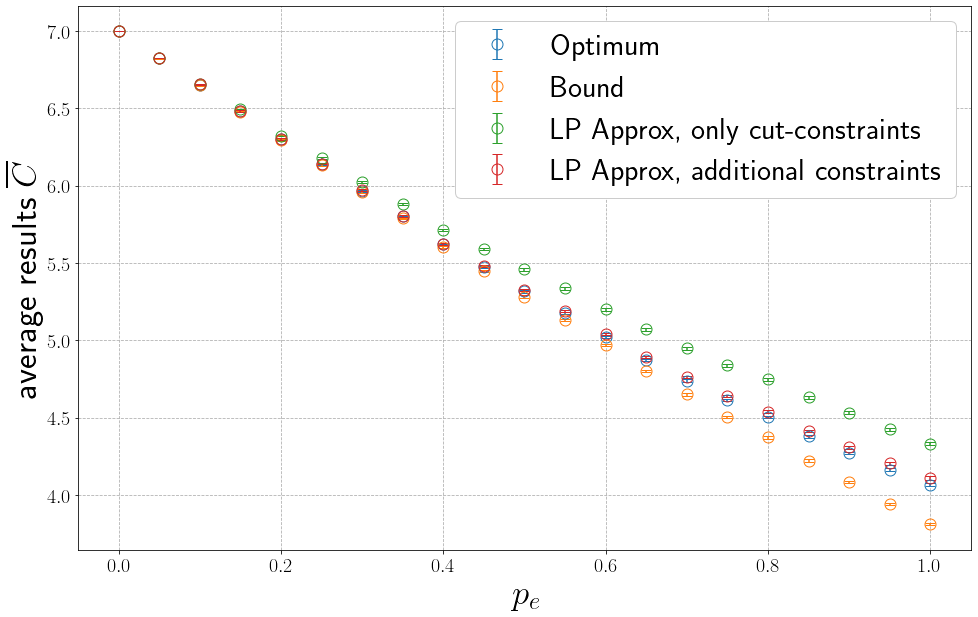

In [5]:
fig, ax = plt.subplots(figsize=(16,10))

ax.errorbar(mr.index, mr['Optimum2'], yerr=sme['Optimum2'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Optimum')
ax.errorbar(mr.index, mr['Schranke4b'], yerr=sme['Schranke4b'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Bound')

ax.errorbar(mr.index, mr['LP_Approx'], yerr=sme['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, only cut-constraints')

# ax.errorbar(mr_ec.index, mr_ec['Schranke4b'], yerr=sme_ec['Schranke4b'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Bound')
ax.errorbar(mr_ec.index, mr_ec['LP_Approx'], yerr=sme_ec['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, additional constraints')

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'average results $\overline{C}$', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
plt.savefig(os.path.join(plot_output_path, 'lp_vs_lp_n8_k5_c4.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

In [6]:
# jetzt die scaling daten: wie skaliert die Anzahl an LP-Iterationen und wie die LP-Gesamtlaufzeit

lp_iterations = []
delta_lp_iterations = []

lp_ms = []
delta_lp_ms = []

for ko in os.listdir(p):
    
    # iterationen
    a = np.loadtxt(os.path.join(p, ko, 'simulation_0', 'Tracking', 'counters.txt'))

    lp_iterations.append(a.mean())
    delta_lp_iterations.append(a.std() / np.sqrt(a.shape[0]))
    
    # ms Laufzeit
    b = np.loadtxt(os.path.join(p, ko, 'simulation_0', 'Tracking', 'total_lp_ms.txt'))
    lp_ms.append(b.mean())
    delta_lp_ms.append(b.std() / np.sqrt(b.shape[0]))
    
lp_iterations_ec = []
delta_lp_iterations_ec = []

lp_ms_ec = []
delta_lp_ms_ec = []

for ko in os.listdir(p_ec):
    
    # iterationen
    a = np.loadtxt(os.path.join(p_ec, ko, 'simulation_0', 'Tracking', 'counters.txt'))

    lp_iterations_ec.append(a.mean())
    delta_lp_iterations_ec.append(a.std() / np.sqrt(a.shape[0]))
    
    # ms Laufzeit
    b = np.loadtxt(os.path.join(p_ec, ko, 'simulation_0', 'Tracking', 'total_lp_ms.txt'))
    lp_ms_ec.append(b.mean())
    delta_lp_ms_ec.append(b.std() / np.sqrt(b.shape[0]))

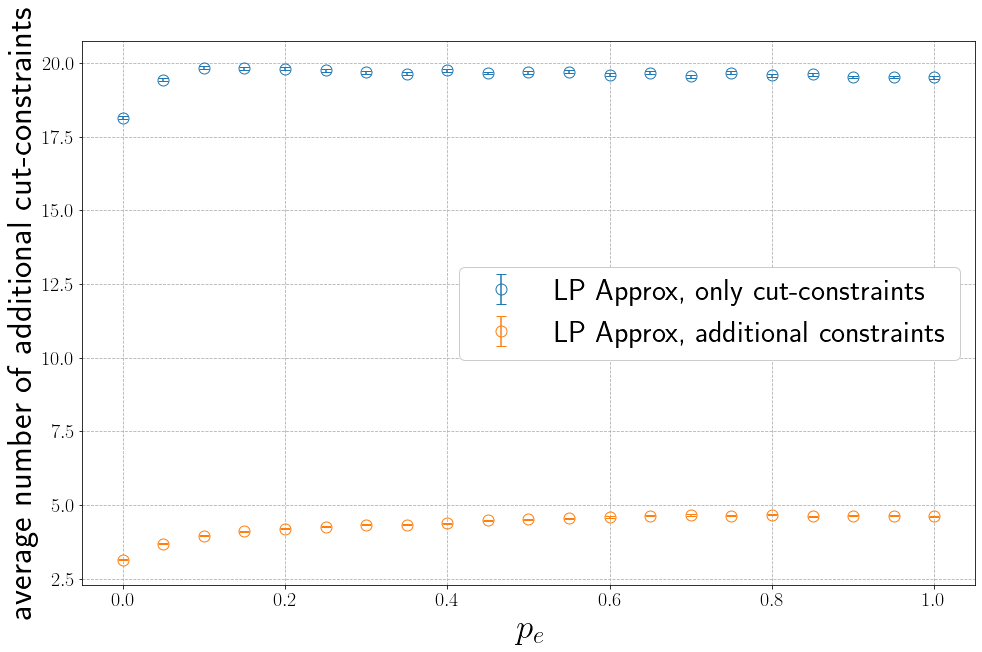

In [7]:
fig, ax = plt.subplots(figsize=(16,10))

ax.errorbar(mr.index, lp_iterations, yerr=delta_lp_iterations, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, only cut-constraints')
ax.errorbar(mr_ec.index, lp_iterations_ec, yerr=delta_lp_iterations_ec, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, additional constraints')


ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'average number of additional cut-constraints', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
plt.savefig(os.path.join(plot_output_path, 'lp_vs_lp_n8_k5_c4_cc.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

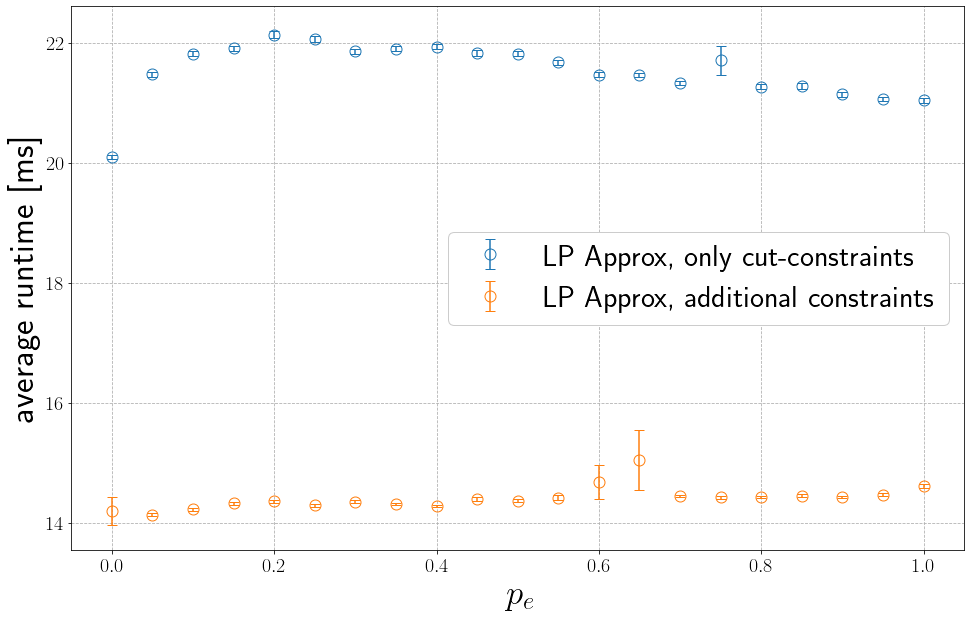

In [8]:
fig, ax = plt.subplots(figsize=(16,10))

ax.errorbar(mr.index, lp_ms, yerr=delta_lp_ms, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, only cut-constraints')
ax.errorbar(mr_ec.index, lp_ms_ec, yerr=delta_lp_ms_ec, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, additional constraints')


ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'average runtime [ms]', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
plt.savefig(os.path.join(plot_output_path, 'lp_vs_lp_n8_k5_c4_ms.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

## Vergleich der beiden LP Kurven für N=50, c=4, k=1

In [109]:
# ohne extra constraints
p = r'D:\Uni\Masterarbeit\Daten\LP_vs_LP\LPVLP5_50_nodes_1_scenarios'

# mit EC
p_ec = r'D:\Uni\Masterarbeit\Daten\LP_vs_LP\LPVLPEC3_50_nodes_1_scenarios'

d = auswertung_ma.Read_HO(p,'p', -2, read_lp=False, read_tracking=False)
d_ec = auswertung_ma.Read_HO(p_ec,'p', -2, read_lp=False, read_tracking=False)

mr, sme = d.calc_mean_alg_results()
mr_ec, sme_ec = d_ec.calc_mean_alg_results()

Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!


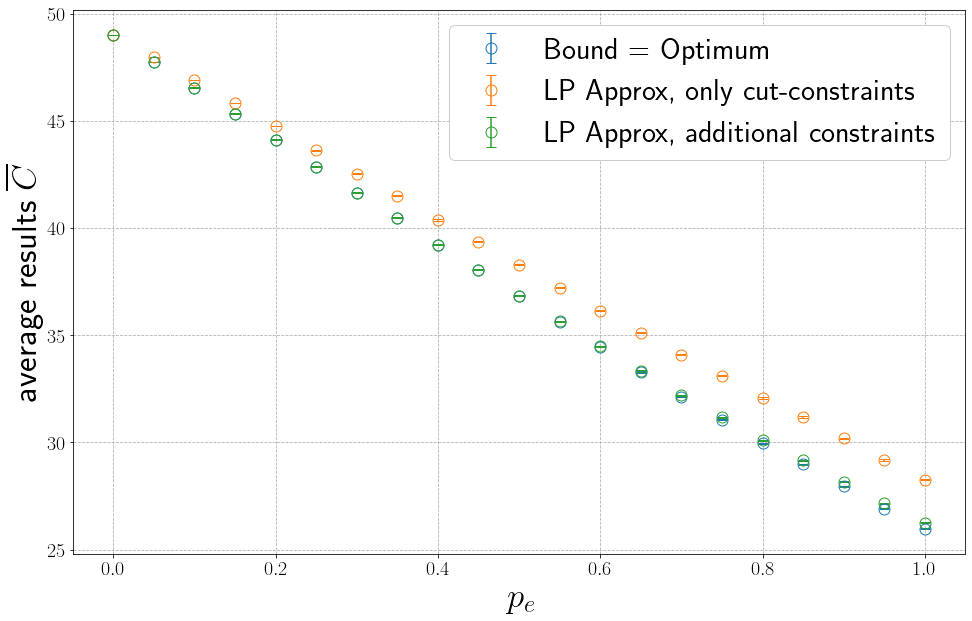

In [110]:
fig, ax = plt.subplots(figsize=(16,10))

# ax.errorbar(mr.index, mr['Optimum2'], yerr=sme['Optimum2'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Optimum')
ax.errorbar(mr_ec.index, mr['Schranke4b'], yerr=sme['Schranke4b'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Bound = Optimum')

ax.errorbar(mr.index, mr['LP_Approx'], yerr=sme['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, only cut-constraints')

# ax.errorbar(mr_ec.index, mr_ec['Schranke4b'], yerr=sme_ec['Schranke4b'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Bound')
ax.errorbar(mr_ec.index, mr_ec['LP_Approx'], yerr=sme_ec['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, additional constraints')

# axins = inset_axes(ax, width='35%', height='35%', loc=3, borderpad=4)
# axins.errorbar(mr.index, mr['Schranke4b'], yerr=sme['Schranke4b'], fmt='o', capsize=capsize, markersize=markersize*1.5, markerfacecolor=markerfacecolor, label='Bound = Optimum')
# axins.errorbar(mr.index, mr['LP_Approx'], yerr=sme['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize*1.5, markerfacecolor=markerfacecolor, label='LP-Approx, only cut-constraints')
# axins.errorbar(mr_ec.index, mr_ec['LP_Approx'], yerr=sme_ec['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize*1.5, markerfacecolor=markerfacecolor, label='LP-Approx, only cut-constraints')
# axins.set_xlim((0.79, 1.01))
# axins.set_ylim((25.5, 30.5))
# axins.grid(ls='--')

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'average results $\overline{C}$', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
plt.savefig(os.path.join(plot_output_path, 'lp_vs_lp_n50_k1_c4.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

In [70]:
# wie gut ist lp an bound dran?
mr_ec['LP_Approx'] - mr_ec['Schranke4b']

ids
0.00    0.000000
0.05    0.000000
0.10    0.000000
0.15    0.000000
0.20    0.000000
0.25    0.000000
0.30    0.000000
0.35    0.000000
0.40    0.000426
0.45    0.001390
0.50    0.003180
0.55    0.009246
0.60    0.022308
0.65    0.043375
0.70    0.070996
0.75    0.110439
0.80    0.148080
0.85    0.184402
0.90    0.220634
0.95    0.245929
1.00    0.276575
dtype: float64

In [73]:
mr['LP_Approx'] == mr['Schranke4b']

ids
0.00     True
0.05    False
0.10    False
0.15    False
0.20    False
0.25    False
0.30    False
0.35    False
0.40    False
0.45    False
0.50    False
0.55    False
0.60    False
0.65    False
0.70    False
0.75    False
0.80    False
0.85    False
0.90    False
0.95    False
1.00    False
dtype: bool

In [65]:
# jetzt die scaling daten: wie skaliert die Anzahl an LP-Iterationen und wie die LP-Gesamtlaufzeit

lp_iterations = []
delta_lp_iterations = []

lp_ms = []
delta_lp_ms = []

for ko in os.listdir(p):
    
    # iterationen
    a = np.loadtxt(os.path.join(p, ko, 'simulation_0', 'Tracking', 'counters.txt'))

    lp_iterations.append(a.mean())
    delta_lp_iterations.append(a.std() / np.sqrt(a.shape[0]))
    
    # ms Laufzeit
    b = np.loadtxt(os.path.join(p, ko, 'simulation_0', 'Tracking', 'total_lp_ms.txt'))
    lp_ms.append(b.mean())
    delta_lp_ms.append(b.std() / np.sqrt(b.shape[0]))
    
lp_iterations_ec = []
delta_lp_iterations_ec = []

lp_ms_ec = []
delta_lp_ms_ec = []

for ko in os.listdir(p_ec):
    
    # iterationen
    a = np.loadtxt(os.path.join(p_ec, ko, 'simulation_0', 'Tracking', 'counters.txt'))

    lp_iterations_ec.append(a.mean())
    delta_lp_iterations_ec.append(a.std() / np.sqrt(a.shape[0]))
    
    # ms Laufzeit
    b = np.loadtxt(os.path.join(p_ec, ko, 'simulation_0', 'Tracking', 'total_lp_ms.txt'))
    lp_ms_ec.append(b.mean())
    delta_lp_ms_ec.append(b.std() / np.sqrt(b.shape[0]))

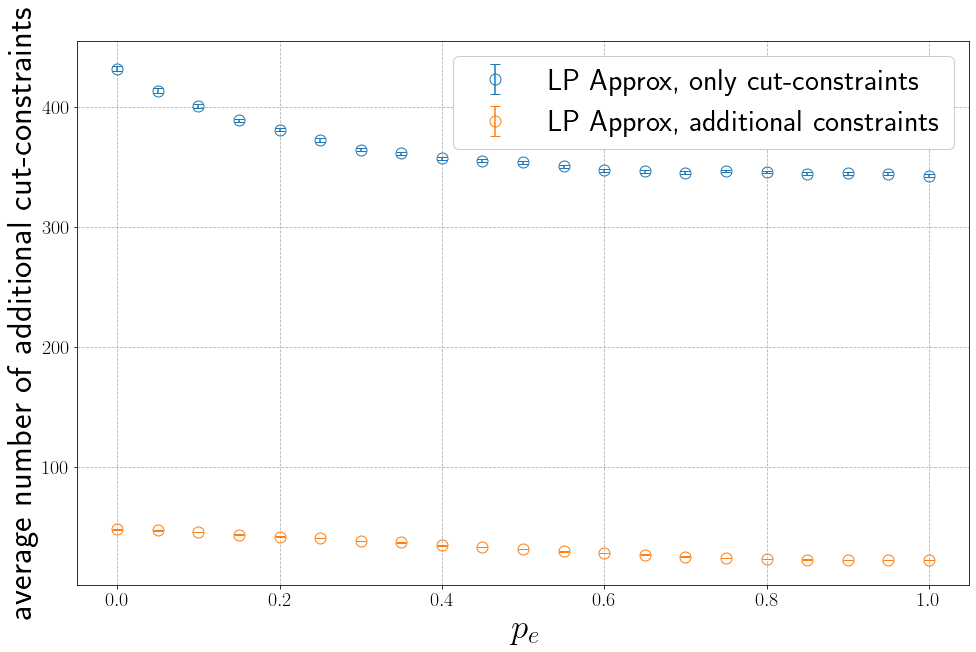

In [66]:
fig, ax = plt.subplots(figsize=(16,10))

ax.errorbar(mr.index, lp_iterations, yerr=delta_lp_iterations, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, only cut-constraints')
ax.errorbar(mr_ec.index, lp_iterations_ec, yerr=delta_lp_iterations_ec, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, additional constraints')


ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'average number of additional cut-constraints', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
plt.savefig(os.path.join(plot_output_path, 'lp_vs_lp_n50_k1_c4_cc.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

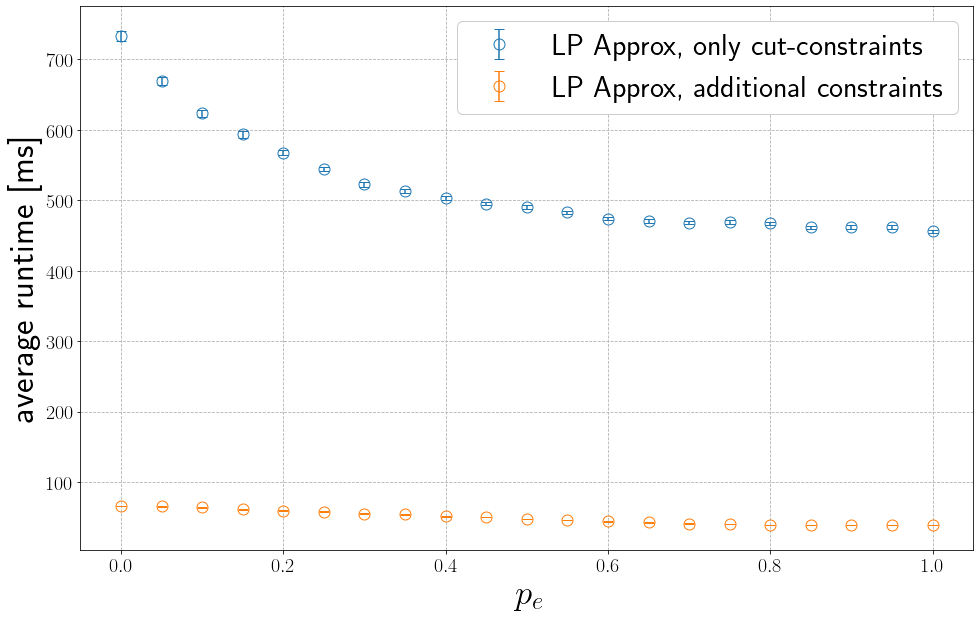

In [67]:
fig, ax = plt.subplots(figsize=(16,10))

ax.errorbar(mr.index, lp_ms, yerr=delta_lp_ms, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, only cut-constraints')
ax.errorbar(mr_ec.index, lp_ms_ec, yerr=delta_lp_ms_ec, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, additional constraints')


ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'average runtime [ms]', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
plt.savefig(os.path.join(plot_output_path, 'lp_vs_lp_n50_k1_c4_ms.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

## Vergleich der beiden LP Kurven für N=50, c=4, k=5

In [111]:
# ohne extra constraints
p = r'D:\Uni\Masterarbeit\Daten\LP_vs_LP\LPVLP5_50_nodes_5_scenarios'

# mit EC
p_ec = r'D:\Uni\Masterarbeit\Daten\LP_vs_LP\LPVLPEC3_50_nodes_5_scenarios'

d = auswertung_ma.Read_HO(p,'p', -2, read_lp=False, read_tracking=False)
d_ec = auswertung_ma.Read_HO(p_ec,'p', -2, read_lp=False, read_tracking=False)

mr, sme = d.calc_mean_alg_results()
mr_ec, sme_ec = d_ec.calc_mean_alg_results()

Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!


In [116]:
mr

,Schranke4b,LP_Approx
ids,,
0.00,49.000000,49.000000
0.05,47.770307,47.778895
0.10,46.549623,46.586605


In [118]:
mr_ec[:0.1]

,Schranke4b,LP_Approx
ids,,
0.00,49.000000,49.000000
0.05,47.770307,47.773585
0.10,46.549623,46.566053


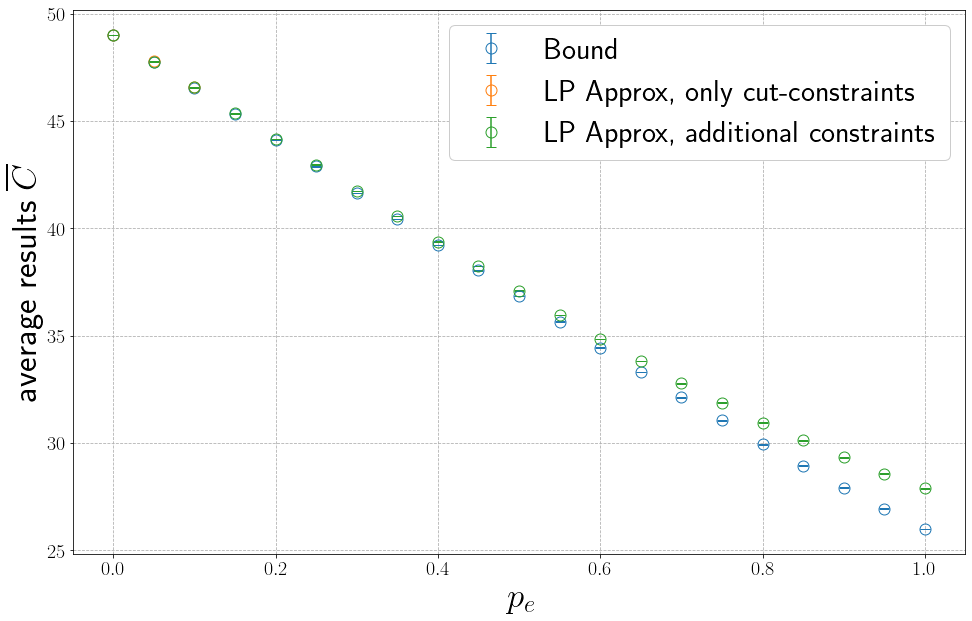

In [112]:
fig, ax = plt.subplots(figsize=(16,10))

# ax.errorbar(mr.index, mr['Optimum2'], yerr=sme['Optimum2'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Optimum')
ax.errorbar(mr_ec.index, mr_ec['Schranke4b'], yerr=sme_ec['Schranke4b'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Bound')

ax.errorbar(mr.index, mr['LP_Approx'], yerr=sme['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, only cut-constraints')

# ax.errorbar(mr_ec.index, mr_ec['Schranke4b'], yerr=sme_ec['Schranke4b'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Bound')
ax.errorbar(mr_ec.index, mr_ec['LP_Approx'], yerr=sme_ec['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, additional constraints')

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'average results $\overline{C}$', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
plt.savefig(os.path.join(plot_output_path, 'lp_vs_lp_n50_k5_c4.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

In [113]:
# jetzt die scaling daten: wie skaliert die Anzahl an LP-Iterationen und wie die LP-Gesamtlaufzeit

lp_iterations = []
delta_lp_iterations = []

lp_ms = []
delta_lp_ms = []

for ko in os.listdir(p):
    
    # iterationen
    a = np.loadtxt(os.path.join(p, ko, 'simulation_0', 'Tracking', 'counters.txt'))

    lp_iterations.append(a.mean())
    delta_lp_iterations.append(a.std() / np.sqrt(a.shape[0]))
    
    # ms Laufzeit
    b = np.loadtxt(os.path.join(p, ko, 'simulation_0', 'Tracking', 'total_lp_ms.txt'))
    lp_ms.append(b.mean())
    delta_lp_ms.append(b.std() / np.sqrt(b.shape[0]))
    
lp_iterations_ec = []
delta_lp_iterations_ec = []

lp_ms_ec = []
delta_lp_ms_ec = []

for ko in os.listdir(p_ec):
    
    # iterationen
    a = np.loadtxt(os.path.join(p_ec, ko, 'simulation_0', 'Tracking', 'counters.txt'))

    lp_iterations_ec.append(a.mean())
    delta_lp_iterations_ec.append(a.std() / np.sqrt(a.shape[0]))
    
    # ms Laufzeit
    b = np.loadtxt(os.path.join(p_ec, ko, 'simulation_0', 'Tracking', 'total_lp_ms.txt'))
    lp_ms_ec.append(b.mean())
    delta_lp_ms_ec.append(b.std() / np.sqrt(b.shape[0]))

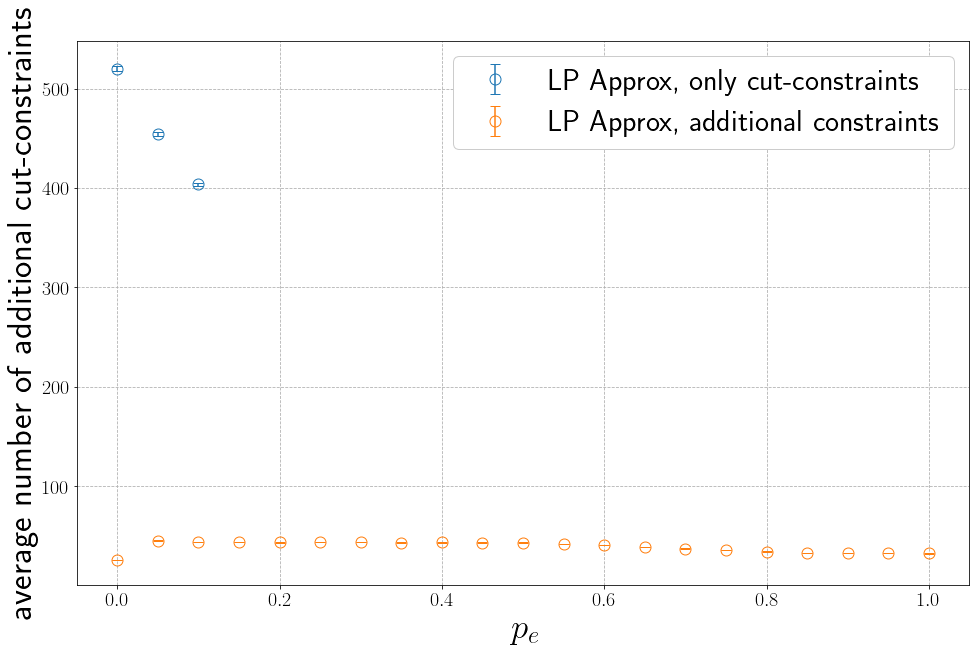

In [114]:
fig, ax = plt.subplots(figsize=(16,10))

ax.errorbar(mr.index, lp_iterations, yerr=delta_lp_iterations, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, only cut-constraints')
ax.errorbar(mr_ec.index, lp_iterations_ec, yerr=delta_lp_iterations_ec, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, additional constraints')


ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'average number of additional cut-constraints', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
plt.savefig(os.path.join(plot_output_path, 'lp_vs_lp_n50_k5_c4_cc.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

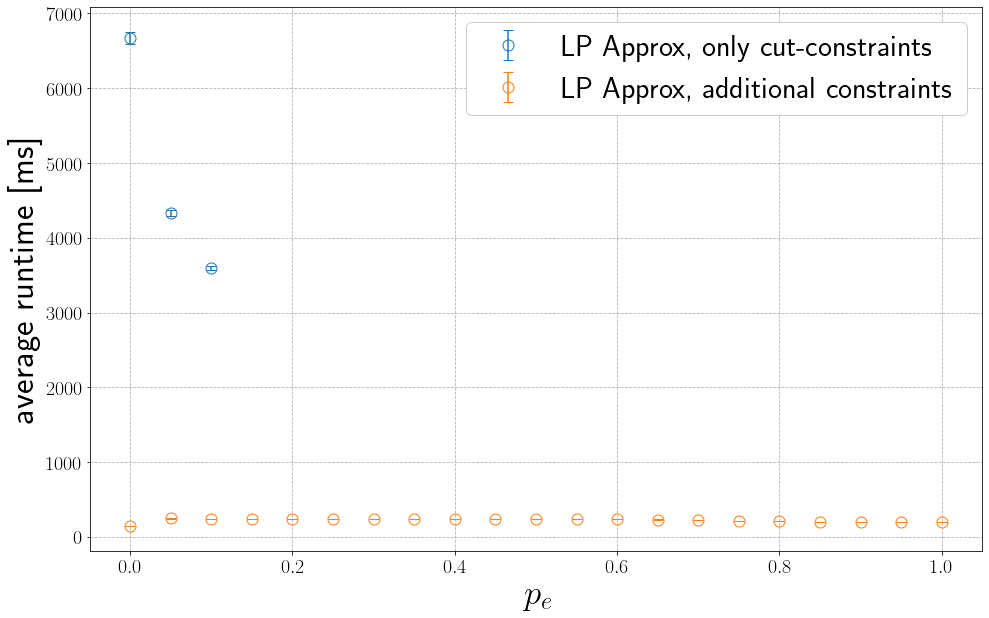

In [115]:
fig, ax = plt.subplots(figsize=(16,10))

ax.errorbar(mr.index, lp_ms, yerr=delta_lp_ms, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, only cut-constraints')
ax.errorbar(mr_ec.index, lp_ms_ec, yerr=delta_lp_ms_ec, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, additional constraints')


ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'average runtime [ms]', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
plt.savefig(os.path.join(plot_output_path, 'lp_vs_lp_n50_k5_c4_ms.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

## Vergleich der beiden LP Kurven für N=50, p=0.5, k=5

In [10]:
# ohne extra constraints
p = r'D:\Uni\Masterarbeit\Daten\LP_vs_LP\LPVLPC5_50_nodes_5_scenarios'

# mit EC
p_ec = r'D:\Uni\Masterarbeit\Daten\LP_vs_LP\LPVLPC3_50_nodes_5_scenarios'

d = auswertung_ma.Read_HO(p,'c', 1, read_lp=False, read_tracking=False)
d_ec = auswertung_ma.Read_HO(p_ec,'c', 1, read_lp=False, read_tracking=False)

mr, sme = d.calc_mean_alg_results()
mr_ec, sme_ec = d_ec.calc_mean_alg_results()

Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!


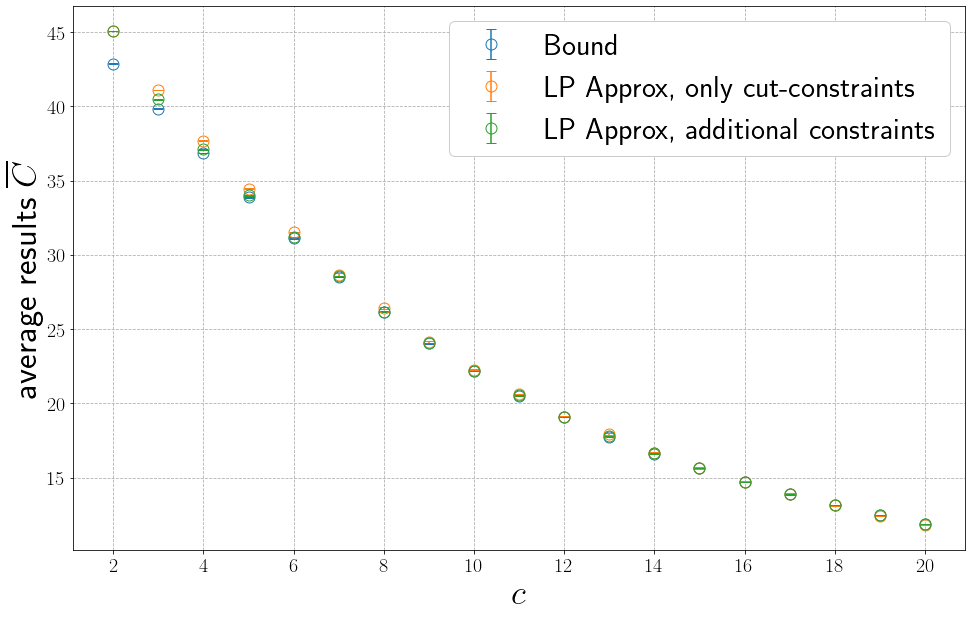

In [11]:
fig, ax = plt.subplots(figsize=(16,10))

# ax.errorbar(mr.index, mr['Optimum2'], yerr=sme['Optimum2'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Optimum')
ax.errorbar(mr_ec.index, mr_ec['Schranke4b'], yerr=sme_ec['Schranke4b'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Bound')

ax.errorbar(mr.index, mr['LP_Approx'], yerr=sme['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, only cut-constraints')

# ax.errorbar(mr_ec.index, mr_ec['Schranke4b'], yerr=sme_ec['Schranke4b'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Bound')
ax.errorbar(mr_ec.index, mr_ec['LP_Approx'], yerr=sme_ec['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, additional constraints')

ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'average results $\overline{C}$', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
    

minor_ticks = np.arange(2,21, 2)

# ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks)
# ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)
    
    
ax.grid(ls='--', which='major')
plt.savefig(os.path.join(plot_output_path, 'lp_vs_lp_n50_k5_pe05.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

In [102]:
# testen, ob fuer c=2 die Ergebnisse mit dem Greedyalg und damit mit dem Optimum uebereinstimmen
pg = r'D:\Uni\Masterarbeit\Daten\LP_vs_LP\LPVLPCGREEDY_50_nodes_5_scenarios'
pg2 = r'D:\Uni\Masterarbeit\Daten\LP_vs_LP\LPVLPCGREEDY2_50_nodes_5_scenarios'
dg = auswertung_ma.Read_HO(pg,'c', 1, read_lp=False, read_tracking=False)
dg2 = auswertung_ma.Read_HO(pg2,'c', 1, read_lp=False, read_tracking=False)

mr_g, sme_g = dg.calc_mean_alg_results()
mr_g2, sme_g2 = dg2.calc_mean_alg_results()

Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!


In [103]:
mr_g2

,Schranke4b,LP_Approx,Greedy
ids,,,
50.0,4.741373,4.741373,49.0


In [104]:
sme_g2

,Schranke4b,LP_Approx,Greedy
ids,,,
50.0,0.039195,0.039195,0.0


In [85]:
mr_s = mr.sort_index()
mr_s['LP_Approx'] - mr_s['Schranke4b']

ids
2.0     2.168433
3.0     1.244625
4.0     0.840272
5.0     0.584911
10.0    0.102709
dtype: float64

In [56]:
# wie aendert sich die Distanz von LP zu Schranke 
mr_ecs = mr_ec.sort_index()
mr_ecs['LP_Approx'] - mr_ecs['Schranke4b']

ids
2.0     2.168433
3.0     0.625102
4.0     0.251470
5.0     0.123292
6.0     0.084689
7.0     0.066848
8.0     0.045787
9.0     0.030975
10.0    0.019028
11.0    0.012295
12.0    0.008469
13.0    0.006030
14.0    0.003796
15.0    0.002019
16.0    0.001545
17.0    0.001059
18.0    0.000629
19.0    0.000419
20.0    0.000303
dtype: float64

In [46]:
mr_ec['LP_Approx'][2:4]

ids
2.0     45.041444
20.0    11.883723
3.0     40.465517
4.0     37.097212
Name: LP_Approx, dtype: float64

In [12]:
# jetzt die scaling daten: wie skaliert die Anzahl an LP-Iterationen und wie die LP-Gesamtlaufzeit

lp_iterations = []
delta_lp_iterations = []

lp_ms = []
delta_lp_ms = []

for ko in os.listdir(p):
    
    # iterationen
    a = np.loadtxt(os.path.join(p, ko, 'simulation_0', 'Tracking', 'counters.txt'))

    lp_iterations.append(a.mean())
    delta_lp_iterations.append(a.std() / np.sqrt(a.shape[0]))
    
    # ms Laufzeit
    b = np.loadtxt(os.path.join(p, ko, 'simulation_0', 'Tracking', 'total_lp_ms.txt'))
    lp_ms.append(b.mean())
    delta_lp_ms.append(b.std() / np.sqrt(b.shape[0]))
    
lp_iterations_ec = []
delta_lp_iterations_ec = []

lp_ms_ec = []
delta_lp_ms_ec = []

for ko in os.listdir(p_ec):
    
    # iterationen
    a = np.loadtxt(os.path.join(p_ec, ko, 'simulation_0', 'Tracking', 'counters.txt'))

    lp_iterations_ec.append(a.mean())
    delta_lp_iterations_ec.append(a.std() / np.sqrt(a.shape[0]))
    
    # ms Laufzeit
    b = np.loadtxt(os.path.join(p_ec, ko, 'simulation_0', 'Tracking', 'total_lp_ms.txt'))
    lp_ms_ec.append(b.mean())
    delta_lp_ms_ec.append(b.std() / np.sqrt(b.shape[0]))

In [133]:
lp_iterations

[467.6362,
 478.4126,
 485.21,
 310.6358,
 284.6114,
 315.0811,
 345.6337,
 408.832,
 431.602,
 455.956]

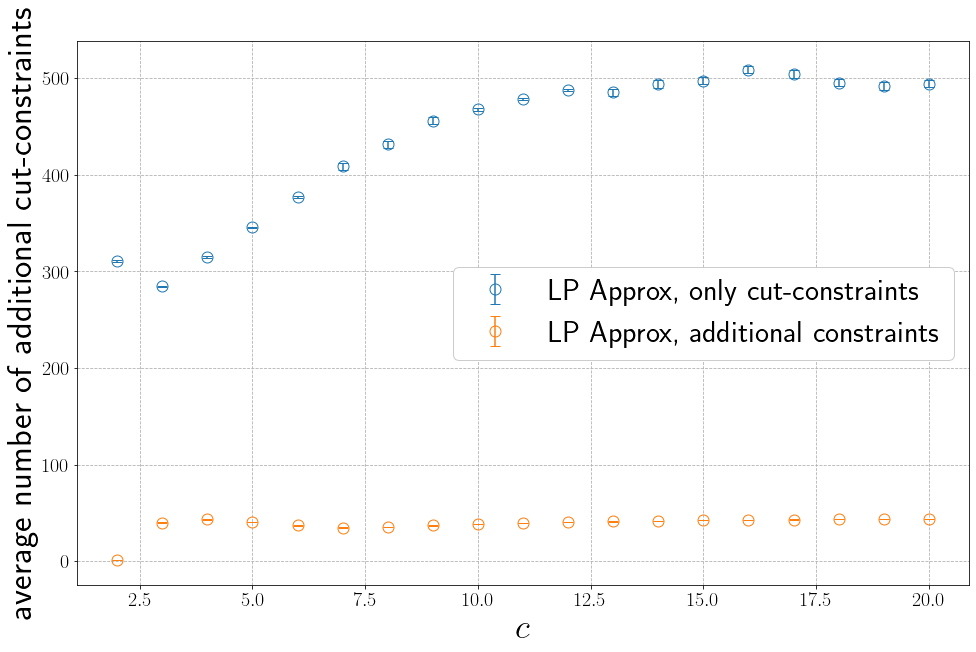

In [13]:
fig, ax = plt.subplots(figsize=(16,10))

ax.errorbar(mr.index, lp_iterations, yerr=delta_lp_iterations, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, only cut-constraints')
ax.errorbar(mr_ec.index, lp_iterations_ec, yerr=delta_lp_iterations_ec, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, additional constraints')


ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'average number of additional cut-constraints', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
plt.savefig(os.path.join(plot_output_path, 'lp_vs_lp_n50_k5_pe05_cc.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

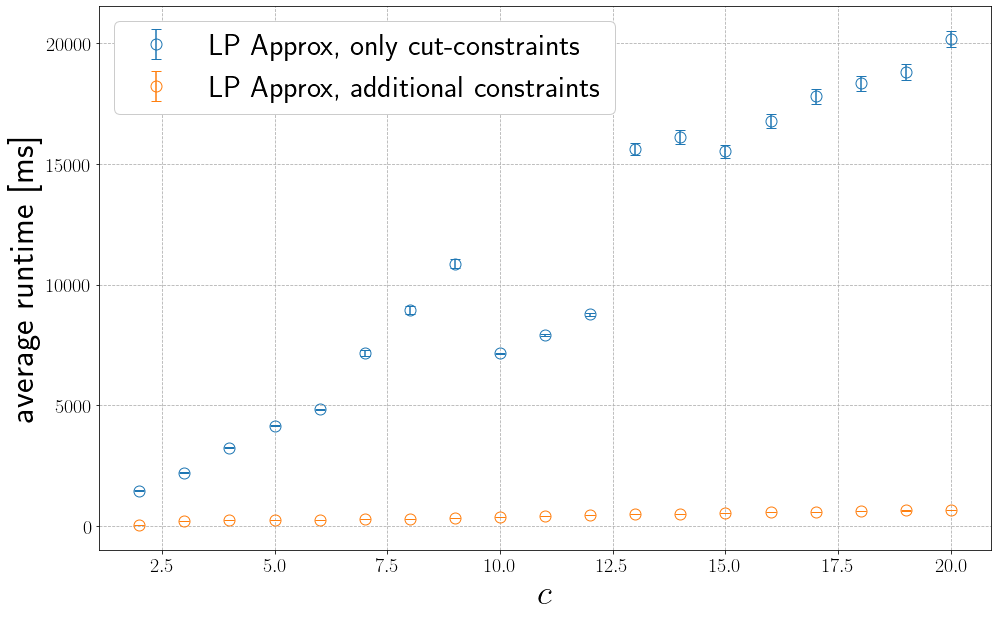

In [14]:
fig, ax = plt.subplots(figsize=(16,10))

ax.errorbar(mr.index, lp_ms, yerr=delta_lp_ms, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, only cut-constraints')
ax.errorbar(mr_ec.index, lp_ms_ec, yerr=delta_lp_ms_ec, fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, additional constraints')


ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'average runtime [ms]', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
plt.savefig(os.path.join(plot_output_path, 'lp_vs_lp_n50_k5_pe05_ms.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

In [21]:
mr_ec['Schranke4b'] - mr_ec['LP_Approx']

ids
10.0   -0.019028
11.0   -0.012295
12.0   -0.008469
13.0   -0.006030
14.0   -0.003796
15.0   -0.002019
16.0   -0.001545
17.0   -0.001059
18.0   -0.000629
19.0   -0.000419
2.0    -2.168433
20.0   -0.000303
3.0    -0.625102
4.0    -0.251470
5.0    -0.123292
6.0    -0.084689
7.0    -0.066848
8.0    -0.045787
9.0    -0.030975
dtype: float64